#FAZENDO OPERACOES BITWISE. PARA ISSO VOU GERAR AS IMAGENS PARA FAZER A MESMA OPERACAO.
## ESTA OPERACAO SERVE PARA REALIZAR COMPARACOES DE PIXEIS DE UMA IMAGENS.

In [1]:
import cv2
import numpy as np

### CRIA AS FORMAS BASICAS (RETANGULO, CIRCULO)

In [20]:
retangulo = np.zeros((300, 300), dtype='uint8')
cv2.rectangle(retangulo, (25, 25), (275, 275), 255, -1)
cv2.imshow('retangulo', retangulo)
cv2.waitKey(0)

-1

In [17]:
circulo = np.zeros((300, 300), dtype='uint8')
cv2.circle(circulo, (150, 150), 150, 255, -1)
cv2.imshow('circulo', circulo)
cv2.waitKey(0)

-1

### REALIZANDO A OPERACAO BITWISE

#### OPERACAO AND

In [13]:
bitwiseand = cv2.bitwise_and(retangulo, circulo)
cv2.imshow('BITWISE AND', bitwiseand)
cv2.waitKey(0)

-1

#### OPERACAO OR

In [14]:
bitwiseor = cv2.bitwise_or(retangulo, circulo)
cv2.imshow('BITWISE OR', bitwiseor)
cv2.waitKey(0)

-1

#### OPERACAO XOR

In [15]:
bitwisexor = cv2.bitwise_or(retangulo, circulo)
cv2.imshow('BITWISE XOR', bitwiseor)
cv2.waitKey(0)

-1

#### OPERACAO NOT

In [18]:
bitwisenot = cv2.bitwise_not(retangulo)
cv2.imshow('BITWISE NOT RETANGULO', bitwisenot)
cv2.waitKey(0)

bitwisenot = cv2.bitwise_not(circulo)
cv2.imshow('BITWISE NOT CIRCULO', bitwisenot)
cv2.waitKey(0)

-1

# APLICANDO MASCARAS
### USADO PARA EXTRAIR INFORMACOES DE INTERESSES DA IMAGEM

In [6]:
img = cv2.imread(r'C:\Users\Plus-TI\Documents\APRENDIZAGEM\OPENCV\jesus-voltara-5959ad34dbccc.jpg')


In [8]:
cv2.imshow('IMG', img)
cv2.waitKey(0)

-1

In [21]:
mask = np.zeros(img.shape[:2], dtype='uint8')
(cX, cY) = (img.shape[1] // 3, img.shape[0] // 3)
cv2.rectangle(mask, (cX - 75, cY - 75), (cX + 75, cY + 75), 255, -1)
cv2.imshow('MASK', mask)
cv2.waitKey(0)

-1

#### APLICANDO O BITWISE AND

In [22]:
masked = cv2.bitwise_and(img, img, mask = mask)
cv2.imshow('MASCARA APLICADA', masked)
cv2.waitKey(0)

-1

# EXTRAIR OS CANAIS DE CORES DA IMAGEM

#### PARA DIVIDIR A IMAGEM EM CANAIS SO UTILIZAR O SPLIT DO CV2
SEMPRE A ORDEM DO OPENCV É BGR. OBSERVE QUE ELE IRA EXIBIR A IMAGEM SEM COR. PARA VER A IMAGEM APENAS COM SEU CANAL PRECISA SER FEITO UM MERGE PARA REMOVER OS PIXELS DO CANAL QUE NÃO ESTA SENDO TRATADA.

In [3]:
(B, G, R) = cv2.split(img)
cv2.imshow('IMAGEM B', B)
cv2.imshow('IMAGEM G', G)
cv2.imshow('IMAGEM R', R)
cv2.waitKey(0)

-1

In [4]:
img_zero = np.zeros(img.shape[:2], dtype='uint8')
cv2.imshow('IMAGEM B', cv2.merge([img_zero, img_zero, B]))
cv2.imshow('IMAGEM G', cv2.merge([img_zero, G, img_zero]))
cv2.imshow('IMAGEM R', cv2.merge([R, img_zero, img_zero]))
cv2.waitKey(0)

-1

# HISTOGRAMA
## COM HISTOGRAMA PODEMOS VER UM GRAFICO ESTATISTICO DOS TONS DE CORES DE UMA IMAGEM

In [3]:
from matplotlib import pyplot as plt

#### CONVERTER A IMAGEM PARA GRAYSCALE

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



In [5]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

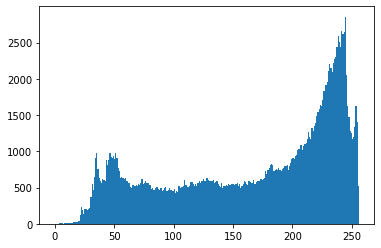

-1

In [6]:
plt.hist(img.ravel(), 256, [0, 256])
plt.show()
cv2.waitKey(0)

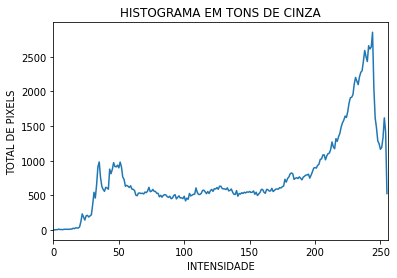

-1

In [7]:
plt.figure()
plt.title('HISTOGRAMA EM TONS DE CINZA')
plt.xlabel('INTENSIDADE')
plt.ylabel('TOTAL DE PIXELS')
plt.plot(hist)
plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)

#### CRIANDO HISTORAMA PARA CADA CANAL DE CORES

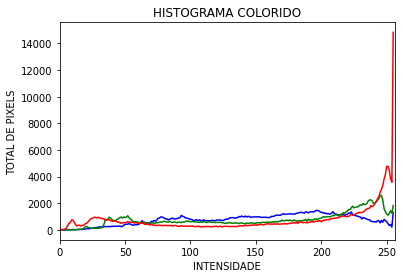

-1

In [7]:
canais = cv2.split(img)
cores = ('b', 'g', 'r')

plt.figure()
plt.title('HISTOGRAMA COLORIDO')
plt.xlabel('INTENSIDADE')
plt.ylabel('TOTAL DE PIXELS')
for (canal, cor) in zip(canais, cores):
    # IRA PERCORRER POR CADA CANAL DE COR
    hist = cv2.calcHist([canal], [0], None, [256], [0, 256])
    plt.plot(hist, color=cor)
    plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)

# EQUALIZAR O HISTOGRAMA

In [10]:
img = cv2.imread(r'C:\Users\Plus-TI\Documents\APRENDIZAGEM\OPENCV\jesus-voltara-5959ad34dbccc.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h_eq = cv2.equalizeHist(img)

cv2.imshow('IMG ORIGINAL', img)
cv2.imshow('IMG EQUALIZADA', h_eq)
cv2.waitKey(0)

-1